In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib import cm
from scipy.stats.mstats import gmean

In [2]:
# Load count data from excel
fname = 'data/sup_figs/031819_CCMB1_anaerobic_colony_counts.xlsx'
cts_df = pd.read_excel(fname)

In [3]:
# Take the geometric mean of CFUs and make a square matrix to show in a heatmap
mean_cts = cts_df.groupby(['cond', 'short_name']).CFU_od_ml.apply(gmean)
square_cts = mean_cts.unstack(level=1)
square_cts[square_cts == 0] = np.NaN

# Reorder in the presentation order
desired_col_order = ['CCMB1+pFE1A', 'CCMB1+pFE1A cbbL-', 'WT']
desired_row_order = ['ambient', 'ambient_no3', '10pct', '10%_no3', 'anaerobic', 'anaerobic_no3']
square_cts = square_cts[desired_col_order]
square_cts = square_cts.loc[desired_row_order]

/usr/local/lib/python3.6/site-packages/scipy/stats/stats.py:330: RuntimeWarning: divide by zero encountered in log
  log_a = np.log(np.array(a, dtype=dtype))


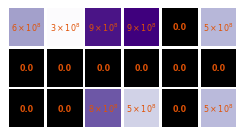

In [4]:
fig = plt.figure(figsize=(3.5,2))
norm = LogNorm(vmin=3e8, vmax=1e9)
oranges = sns.color_palette('Oranges')

# Zeros are black
my_cmap = cm.Purples
my_cmap.set_bad(color='black')
plt.pcolormesh(square_cts.T, edgecolors='w', linewidth=2, cmap=my_cmap)

plt.xticks([])
plt.yticks([])

for x, idx in enumerate(square_cts.index):
    for y, colname in enumerate(square_cts.columns):
        val = square_cts.at[idx, colname]
        s = '0.0'
        color = oranges[-2]
        if val > 0:
            power = str(np.log10(val))[0]
            mult = str(val)[0]
            s = '$%s \\times 10^{%s}$' % (mult, power)
        
        plt.text(x+0.5, y+0.5, s, color=color, ha='center', va='center', weight='bold', fontsize=8)

sns.despine(bottom=True, left=True)
plt.tight_layout()
plt.savefig('figS4/figS4B.png', dpi=600)
plt.show()